In [1]:
#install.packages("pacman")
pacman::p_load(tidyverse,ggplot2,skimr)
# Standard package by the inventor of synthetic controls https://cran.r-project.org/web/packages/Synth/index.html
pacman::p_load(Synth,SCtools)
# More recent package https://nppackages.github.io/scpi/
#pacman::p_load(scpi)
# Newest package with more recent techniques https://github.com/synth-inference/synthdid
#pacman::p_load_gh("synth-inference/synthdid")

## Description
The dataset contains information from 1955–1997 on 17 Spanish regions. It was used by Abadie and Gardeazabal (2003), which studied the economic effects of conflict, using the terrorist conflict in the Basque Country as a case study. This paper used a combination of other Spanish regions to construct a synthetic control region resembling many relevant economic characteristics of the Basque Country before the onset of political terrorism in the 1970s. The data contains per-capita GDP (the outcome variable), as well as population density, sectoral production, investment, and human capital (the predictor variables) for the relevant years, and is used here to demonstrate the implementation of the synthetic control method with the synth library.

## Format
A panel dataframe made up of 18 units: 1 treated (no 17; the Basque country) and 16 control regions (no. 2-16,18). Region no. 1 is the average for the whole country of Spain. 1 outcome variable (gdpcap). 13 predictor variables (6 sectoral production shares, 6 highest educational attainment categories, population density, and the investment rate). Region names and numbers are stored in regionno and regionname. 42 time periods (1955 - 1997). All columns have self-explanatory column names.

In [16]:
data(basque)
skim(basque)

── Data Summary ────────────────────────
                           Values
Name                       basque
Number of rows             774   
Number of columns          17    
_______________________          
Column type frequency:           
  character                1     
  numeric                  16    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 regionname            0             1   6  28     0       18          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable         n_missing complete_rate    mean      sd      p0     p25
 1 regionno                      0        1         9.5     5.19    1       5   
 2 year                          0        1      1976      12.4  1955    1965   
 3 gdpcap                        0        1         5.39    2.24

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,regionname,0,1.00000000,6,28,0,18,0,NA,NA,NA,NA,NA,NA,NA,NA
2,numeric,regionno,0,1.00000000,NA,NA,NA,NA,NA,9.500000,5.191482,1.000000,5.000000,9.500000,14.000000,18.00000,▇▆▇▆▇
3,numeric,year,0,1.00000000,NA,NA,NA,NA,NA,1976.000000,12.417698,1955.000000,1965.000000,1976.000000,1987.000000,1997.00000,▇▇▇▇▇
4,numeric,gdpcap,0,1.00000000,NA,NA,NA,NA,NA,5.394987,2.242637,1.243430,3.693034,5.335690,6.869091,12.35004,▅▇▇▂▁
5,numeric,sec.agriculture,684,0.11627907,NA,NA,NA,NA,NA,20.268445,10.376150,1.320000,13.542500,19.240000,27.482500,46.50000,▅▇▇▅▂
6,numeric,sec.energy,684,0.11627907,NA,NA,NA,NA,NA,5.188556,4.035458,1.600000,2.697500,3.675000,6.080000,21.36000,▇▂▁▁▁
7,numeric,sec.industry,684,0.11627907,NA,NA,NA,NA,NA,23.915333,9.281848,9.560000,17.809999,23.135000,27.480000,46.22000,▅▇▆▂▂
8,numeric,sec.construction,684,0.11627907,NA,NA,NA,NA,NA,7.211556,1.361570,4.340000,6.240000,7.135000,8.177500,11.28000,▃▇▆▅▁
9,numeric,sec.services.venta,684,0.11627907,NA,NA,NA,NA,NA,36.485222,7.261439,26.230000,31.247500,34.750000,39.192500,58.21000,▇▇▃▁▂


In [2]:
# dataprep: prepare data for synth
dataprep_out =
    dataprep(
    foo = basque, 
    predictors= c(
        "school.illit",
        "school.prim",
        "school.med",
        "school.high",
        "school.post.high",
        "invest"
    ),
	predictors.op = c("mean"),
	dependent = c("gdpcap"),
	unit.variable = c("regionno"),
    time.variable = c("year"),
    # These variables need special treatment, since they are only available in certain years
    # Hopefully in your application you won't have this problem, and can put everything in the predictors variable
	special.predictors = list( 
        list("gdpcap",1960:1969,c("mean")), 
        list("sec.agriculture",seq(1961,1969,2),c("mean")), 
        list("sec.energy",seq(1961,1969,2),c("mean")), 
        list("sec.industry",seq(1961,1969,2),c("mean")), 
        list("sec.construction",seq(1961,1969,2),c("mean")), 
        list("sec.services.venta",seq(1961,1969,2),c("mean")), 
        list("sec.services.nonventa",seq(1961,1969,2),c("mean")), 
        list("popdens",1969,c("mean"))),
	treatment.identifier = 17,
	controls.identifier = c(2:16,18),
	time.predictors.prior = c(1964:1969),
	time.optimize.ssr = c(1960:1969),
	unit.names.variable = c("regionname"),
	time.plot = c(1955:1997)
)

In [3]:
synth_out <- synth(data.prep.obj = dataprep_out)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.008864627 

solution.v:
 0.006876996 3.0188e-06 3.9662e-06 0.004658738 4.8498e-06 0.005337632 0.02833932 0.241305 0.0197166 0.2024013 0.02772178 0.001862496 0.07553507 0.3862332 

solution.w:
 4e-08 5.53e-08 7.9e-08 4.82e-08 4.98e-08 5.406e-07 4.84e-08 7.72e-08 0.8508135 2.331e-07 3.42e-08 8.57e-08 0.1491849 6.39e-08 1.11e-07 1.592e-07 



In [4]:
synth_tables <- synth.tab(
    dataprep.res = dataprep_out,
    synth.res = synth_out
)
print(synth_tables)

$tab.pred
                                         Treated Synthetic Sample Mean
school.illit                              39.888   256.337     170.786
school.prim                             1031.742  2730.102    1127.186
school.med                                90.359   223.340      76.260
school.high                               25.728    63.437      24.235
school.post.high                          13.480    36.153      13.478
invest                                    24.647    21.583      21.424
special.gdpcap.1960.1969                   5.285     5.271       3.581
special.sec.agriculture.1961.1969          6.844     6.179      21.353
special.sec.energy.1961.1969               4.106     2.760       5.310
special.sec.industry.1961.1969            45.082    37.636      22.425
special.sec.construction.1961.1969         6.150     6.952       7.276
special.sec.services.venta.1961.1969      33.754    41.104      36.528
special.sec.services.nonventa.1961.1969    4.072     5.371       7.

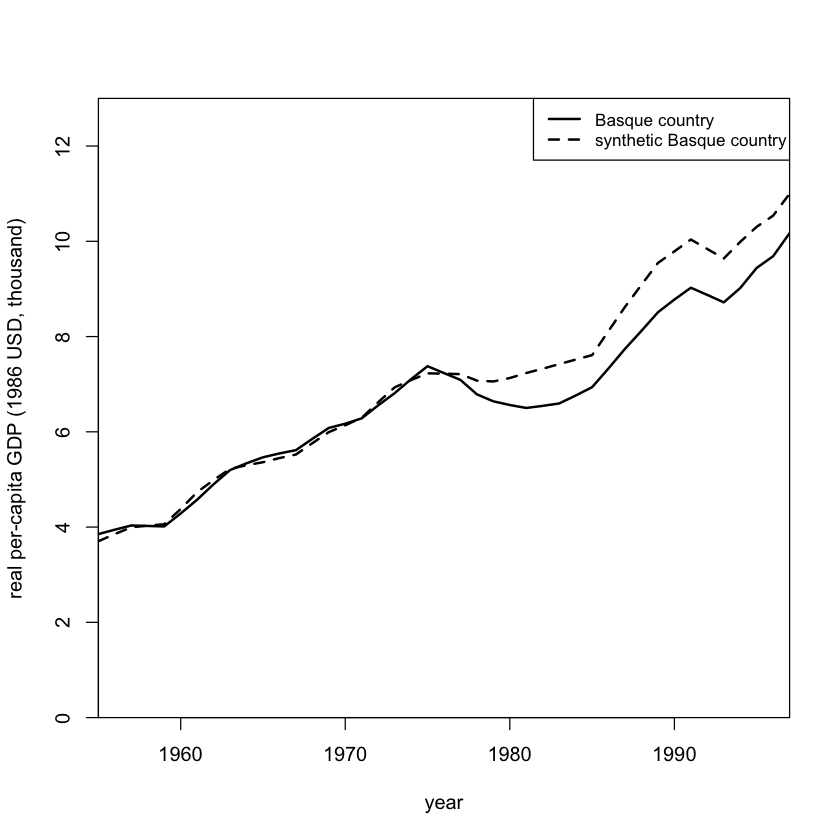

In [5]:
path.plot(
    synth.res = synth_out,
    dataprep.res = dataprep_out,
    Ylab = c("real per-capita GDP (1986 USD, thousand)"),
    Xlab = c("year"),
    Ylim = c(0,13),
    Legend = c("Basque country","synthetic Basque country"),
)

## Frequency of violence during the period
![Violence in Basque Country](violence.png)

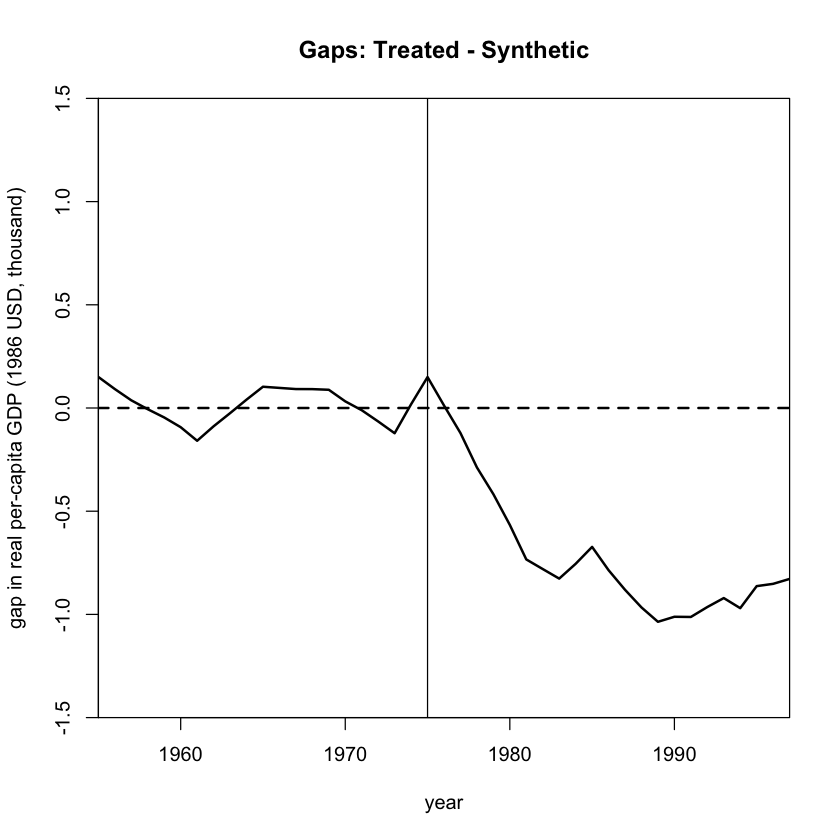

In [45]:
gaps.plot(
    synth.res = synth_out,
    dataprep.res = dataprep_out,
    Ylab = c("gap in real per-capita GDP (1986 USD, thousand)"),
    Xlab = c("year"),
    Ylim = c(-1.5,1.5),
)
#abline(v=1969)

In [25]:
placebos <- generate.placebos(dataprep_out, synth_out, Sigf.ipop = 3)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.0002431201 

solution.v:
 0.1108142 0.01086232 0.0002059239 0.0004227525 3.53406e-05 0.001485417 0.217988 0.01665614 0.02360976 0.1451214 0.09720823 0.0005205219 0.1198702 0.2551997 

solution.w:
 0.0001108355 6.15959e-05 9.88839e-05 0.0002276228 4.13204e-05 0.0001040606 1.985e-07 0.05615574 8.1404e-06 0.291508 0.6317595 0.01973725 8.2128e-05 5.94326e-05 4.52796e-05 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.0005165863 

solution.v:
 0.1950434 0.03821485 0.02180427 0.07008232 0.09885328 0.0001683499 0.06836628 0.2010556 0.04045793 0.1737331 0.01191071 0.02041153 0.0598434 5.4963e-05 

solution.w:
 0.009810473 0.1642507 0.05790001 0.08431173 0.01231037

New names:
• `w.weight` -> `w.weight...1`
• `w.weight` -> `w.weight...2`
• `w.weight` -> `w.weight...3`
• `w.weight` -> `w.weight...4`
• `w.weight` -> `w.weight...5`
• `w.weight` -> `w.weight...6`
• `w.weight` -> `w.weight...7`
• `w.weight` -> `w.weight...8`
• `w.weight` -> `w.weight...9`
• `w.weight` -> `w.weight...10`
• `w.weight` -> `w.weight...11`
• `w.weight` -> `w.weight...12`
• `w.weight` -> `w.weight...13`
• `w.weight` -> `w.weight...14`
• `w.weight` -> `w.weight...15`
• `w.weight` -> `w.weight...16`


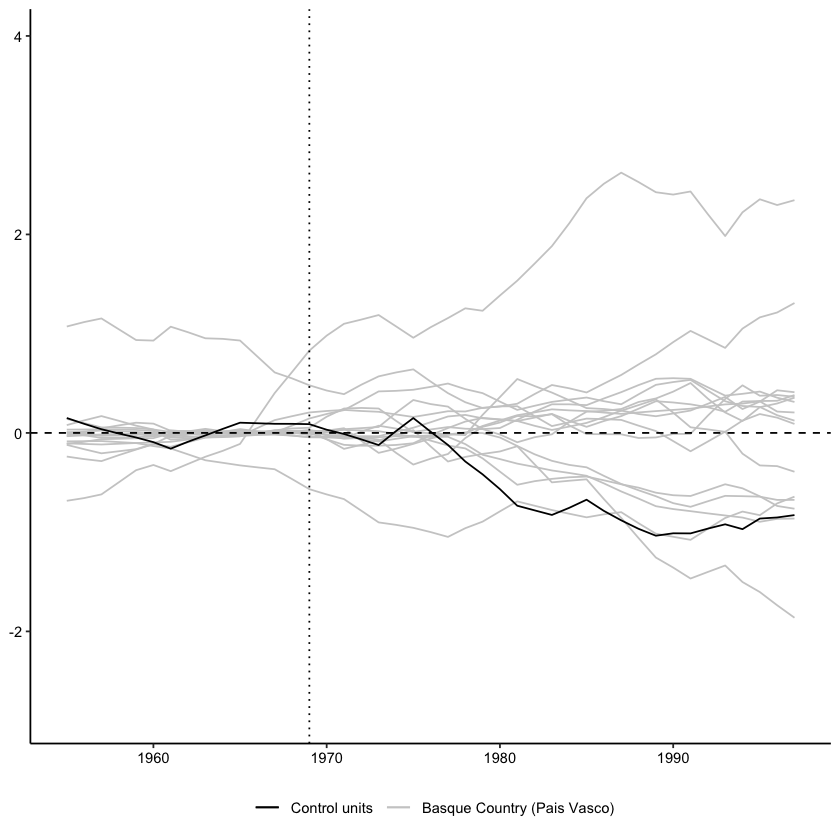

In [17]:
plot_placebos(placebos)

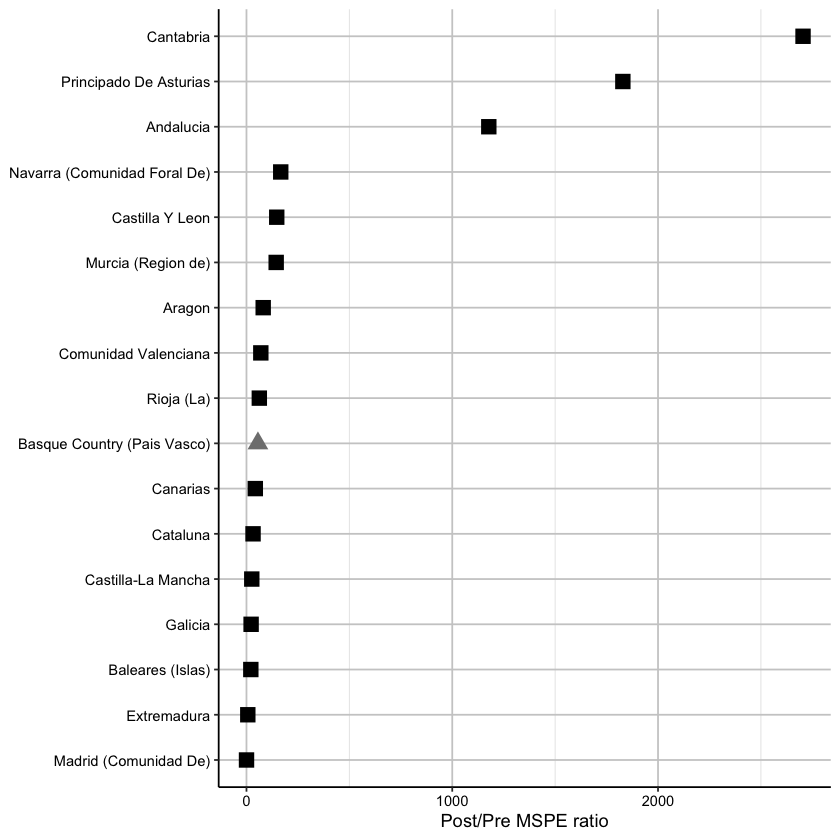

In [26]:
mspe.plot(placebos)
